<Train Set & Test Set>

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


fish_data=[[l,w] for l, w in zip(fish_length,fish_weight)]
fish_target=[1]*35+[0]*14

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

print(fish_data[4])
print(fish_data[0:5]) #0~4까지

train_input=fish_data[:35]
train_target=fish_target[:35]

test_input=fish_data[35:]
test_target=fish_target[35:]

kn.fit(train_input, train_target)
kn.score(test_input, test_target)


[29.0, 430.0]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


0.0

데이터를 Training 과 Test 용으로 랜덤으로 나누기(빙어와 도미 데이터가 순서대로 있기 때문)

(49, 2)
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]
[[ 26.3 290. ]
 [ 29.  363. ]]


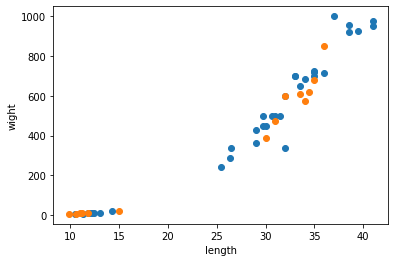

In [ ]:
from operator import index
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr.shape)

np.random.seed(42)
index=np.arange(49)
np.random.shuffle(index)

print(index)

print(input_arr[[1,3]])

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) # train_input[:,0] --> [row, col]
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('wight')
plt.show()

데이터 트레이닝

In [ ]:
kn.fit(train_input, train_target)
kn.score(test_input,test_target)  #1.0 일때는 모두 Corret

kn.predict(test_input)  # test_input 데이터를 프로그램에 넣고 결과를 확인

kn.predict([[25,150]])  # But 문제가 발생. [25,150] 은 값이 1이여야 하는데, 0 이 나옴!


array([0])

<02-2 데이터 전처리>

STEP 1. numpy 배열(ndarray 로 Data set 재정리리)

In [ ]:
import numpy as npp

# npp.column_stack(([1,2,3], [4,5,6]))

fish_data = npp.column_stack((fish_length,fish_weight))

print(fish_data[:5])

print(npp.ones(5))

fish_target = npp.concatenate((npp.ones(35),npp.zeros(14))) #데이터가 큰 경우 numpy 배열을 사용할 것, 리스트는 비효율적임임

print(fish_target)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


STEP2. Train Set과 Test Set 나누기

In [1]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target,random_state=42)
# stratify를 사용하면 fish_target 데이터에 들어있는 비율대로 나누어짐

print(test_target)

NameError: ignored

[0.]


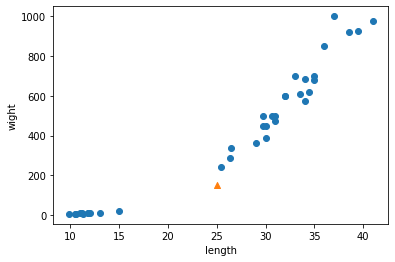

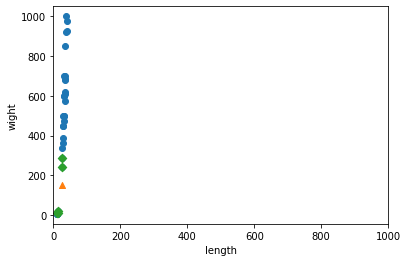

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]
[[1. 0. 0. 1. 0.]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print(kn.predict([[25,150]]))

plt.scatter(train_input[:,0], train_input[:,1]) # train_input[:,0] --> [row, col]
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('wight')
plt.show()

distance, indexes = kn.kneighbors([[25,150]])   # [25,150]에서 가장 가까운 점까지의 거리와 그에 해당하는 점의 좌표 return, 현재 이웃 5개의 값을 사용

plt.scatter(train_input[:,0], train_input[:,1]) # train_input[:,0] --> [row, col]
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('wight')
plt.xlim((0,1000))
plt.show()

print(train_input[indexes])
print(train_target[indexes])

# x축의 영향이 y축의 영향보다 작음 --> 전처리가 필요

STEP3. 기준을 표준점수로 다시 맞추기
: 각 특성값이 평균에서 표준편차의 몇 배 만큼 떨어져 있는지를 비교교

In [ ]:
mean = npp.mean(train_input,axis=0) #평균균
std = npp.std(train_input, axis=0)  #표준편차

print(mean, std)

train_scaled = (train_input - mean)/std

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


STEP4. 변경한 기준으로 다시 훈련시키기

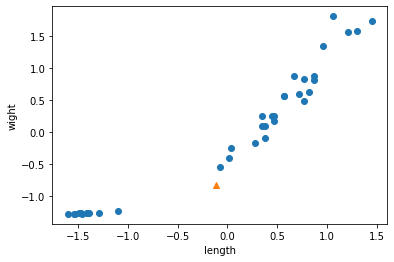

[1.]


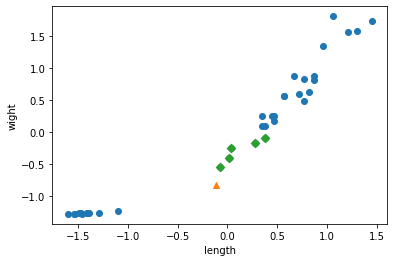

In [ ]:
new_sample = ([25,150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1]) 
plt.scatter(new_sample[0],new_sample[1], marker='^')
plt.xlabel('length')
plt.ylabel('wight')
plt.show()

kn.fit(train_scaled, train_target)
test_scaled =(test_input-mean)/std
kn.score(test_scaled, test_target)

print(kn.predict([new_sample]))

distance, indexes = kn.kneighbors([new_sample])

plt.scatter(train_scaled[:,0], train_scaled[:,1]) 
plt.scatter(new_sample[0],new_sample[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('wight')
plt.show()